# ASP 
## From easy to complex  
### 2020 - 7- 1

In [1]:
from PW_explorer.run_clingo import run_clingo
from PW_explorer.load_worlds import load_worlds
from PW_explorer.pwe_nb_helper import ASPRules
from copy import deepcopy

In [2]:
# help to read magic function %clingo and magic %%clingo
%load_ext PWE_NB_Extension

### 1. Given a simple graph (e.g. a “Causal DAG”), compute: 
- its transitive closure
- the transitive reduction of the transitive closure
- the LCA(Lowest Common Ancestor) of a pair of nodes.


In [3]:
%%clingo --run --donot-display_input

% A transitive closure graph
e(a,b).
e(b,c).
e(b,a).
e(c,d).

tc(X,Y) :- e(X,Y).
tc(X,Y) :- e(X,Z), tc(Z,Y).

% We want to test whether a given graph relation g/2 is transitive or not:

% First, let's copy some relation into g/2: 
g(X,Y) :- tc(X,Y).

% if a transitive edge is missing, report it:
missing(X,Z,Y) :- g(X,Z), g(Z,Y), not g(X,Y).

transitive(no) :- missing(X,Y,Z).

transitive(yes) :- not transitive(no).

#show transitive/1.

ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
Output:


'Answer: 1\ntransitive(yes)\nSATISFIABLE\n\nModels       : 1\nCalls        : 1\nTime         : 0.001s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.001s'

In [4]:
%%clingo --run --donot-display_input

% the transitive reduction of the transitive closure

% A transitive graph d := tc(e) = e+ 
%d(a,b). d(b,c). d(b,a). d(c,d). d(b,d). d(a,a). d(a,c). d(b,b). d(a,d).
d(a,b). d(b,c). d(b,a). d(c,d). d(b,d). d(a,c). d(a,d).
% An edge is transitive, if there are two edges as follows: 
tedge(X,Y) :- d(X,Z), d(Z,Y).

% INCORRECT: 
reduced_d(X,Y) :- d(X,Y),  tedge(X,Y).

result(X,Y) :- d(X,Y), not reduced_d(X,Y).

%#show reduced_d/2.
#show result/2.

% result deleted a key link b->c

ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
Output:


'Answer: 1\nresult(a,b) result(b,a) result(c,d)\nSATISFIABLE\n\nModels       : 1\nCalls        : 1\nTime         : 0.001s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.001s'

In [5]:
%%clingo --run --donot-display_input

% the transitive reduction of the transitive closure

% A transitive graph d := tc(e) = e+ 
%d(a,b). d(b,c). d(b,a). d(c,d). d(b,d). d(a,a). d(a,c). d(b,b). d(a,d).
d(a,b). d(b,c). d(b,a). d(c,d). d(b,d). d(a,c). d(a,d).
% An edge is transitive, if there are two edges as follows: 
tedge(X,Y) :- d(X,Z), d(Z,Y).

% INCORRECT: 
reduced_d(X,Y) :- d(X,Y),  tedge(X,Y).

%result(X,Y) :- d(X,Y), not reduced_d(X,Y).

%#show reduced_d/2.
%#show result/2.

#show tedge/2.

ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
Output:


'Answer: 1\ntedge(b,b) tedge(a,c) tedge(a,a) tedge(b,d) tedge(a,d) tedge(b,c)\nSATISFIABLE\n\nModels       : 1\nCalls        : 1\nTime         : 0.001s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.001s'

https://www.hackerrank.com/topics/lowest-common-ancestor

# Learning how to draw DAG

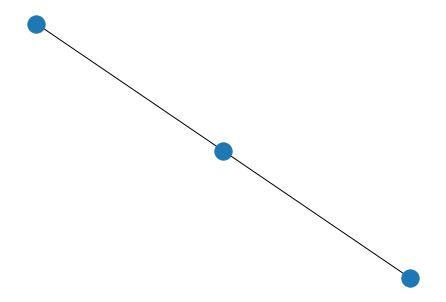

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
G=nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3])
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e)
nx.draw(G)

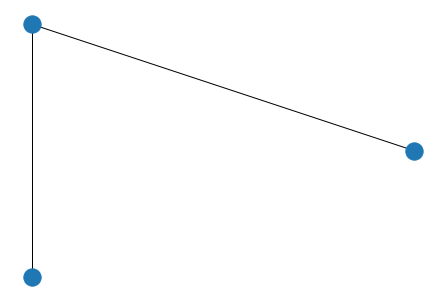

In [7]:
nx.draw_circular(G)

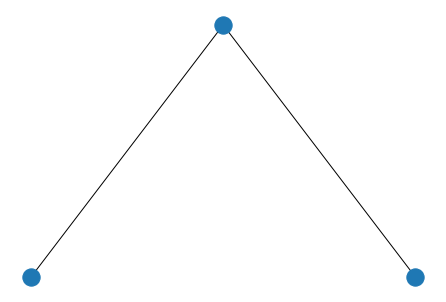

In [8]:
nx.draw_spectral(G)

In [9]:
plt.show()

In [10]:
plt.savefig("path.png")

<Figure size 432x288 with 0 Axes>

In [11]:
DG=nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])

In [12]:
DG.successors(1)

In [13]:
DG.neighbors(1)

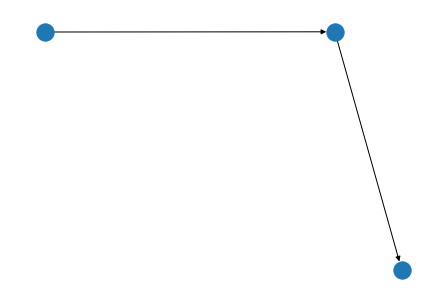

In [14]:
nx.draw(DG)

(-0.6994012625691778,
 0.8263459719029141,
 -1.1564728946326113,
 0.9474804367646714)

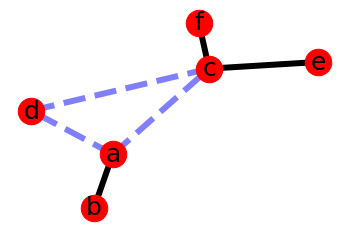

In [15]:
G=nx.Graph()

G.add_edge('a','b',weight=0.6)
G.add_edge('a','c',weight=0.2)
G.add_edge('c','d',weight=0.1)
G.add_edge('c','e',weight=0.7)
G.add_edge('c','f',weight=0.9)
G.add_edge('a','d',weight=0.3)

elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.5]
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.5]

pos=nx.spring_layout(G) # positions for all nodes

# nodes
nx.draw_networkx_nodes(G,pos,node_size=700,node_color='r',)

# edges
nx.draw_networkx_edges(G,pos,edgelist=elarge,
                    width=6)
nx.draw_networkx_edges(G,pos,edgelist=esmall,
                    width=6,alpha=0.5,edge_color='b',style='dashed')

# labels
nx.draw_networkx_labels(G,pos,font_size=25,font_family='sans-serif')

plt.axis('off')

# Drawing DAG for ASP

In [16]:
from PW_explorer.run_clingo import run_clingo
from PW_explorer.load_worlds import load_worlds
from PW_explorer.pwe_nb_helper import ASPRules
from copy import deepcopy
%load_ext PWE_NB_Extension

The PWE_NB_Extension extension is already loaded. To reload it, use:
  %reload_ext PWE_NB_Extension


In [17]:
%%clingo --run --donot-display_input

e(a,b).
e(b,c).
e(b,a).
e(c,d).

tc(X,Y) :- e(X,Y).
tc(X,Y) :- e(X,Z), tc(Z,Y).

% We want to test whether a given graph relation g/2 is transitive or not:

% First, let's copy some relation into g/2: 
g(X,Y) :- tc(X,Y).

% if a transitive edge is missing, report it:
missing(X,Z,Y) :- g(X,Z), g(Z,Y), not g(X,Y).
#show g/2.

ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
Output:


'Answer: 1\ng(a,b) g(b,c) g(b,a) g(c,d) g(b,d) g(a,a) g(a,c) g(b,b) g(a,d)\nSATISFIABLE\n\nModels       : 1\nCalls        : 1\nTime         : 0.001s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.001s'

In [18]:
test_rules = []
test_rules.append('% Here is a test rules')
nodes = ('a', 'b', 'c', 'd')
initial_edges = 'e(a,b).e(b,c).e(b,a).e(c,d).'
test_rules.append(initial_edges)
test_rules.append('tc(X,Y) :- e(X,Y).tc(X,Y) :- e(X,Z), tc(Z,Y).')
test_rules.append('g(X,Y) :- tc(X,Y).')
test_rules.append('#show g/2.')

In [19]:
ASPRules('\n'.join(test_rules))

'% Here is a test rules\ne(a,b).e(b,c).e(b,a).e(c,d).\ntc(X,Y) :- e(X,Y).tc(X,Y) :- e(X,Z), tc(Z,Y).\ng(X,Y) :- tc(X,Y).\n#show g/2.'

In [20]:
%clingo -l test_rules --saveto clingo_soln --save_meta_data_to meta_data --donot-display_input

ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
Output:


'Answer: 1\ng(a,b) g(b,c) g(b,a) g(c,d) g(b,d) g(a,a) g(a,c) g(b,b) g(a,d)\nSATISFIABLE\n\nModels       : 1\nCalls        : 1\nTime         : 0.001s (Solving: 0.00s 1st Model: 0.00s Unsat: 0.00s)\nCPU Time     : 0.001s'

In [21]:
pw_rels_dfs, rel_schemas, pw_objs = load_worlds(asp_output=clingo_soln, meta_data=meta_data, reasoner='clingo')

ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
ANTLR runtime and generated code versions disagree: 4.8!=4.7.1
Number of Models: 1


In [22]:
pw_rels_dfs.keys()

dict_keys(['g_2'])

In [23]:
edge_rel_name = ('g_2')
pw_rels_dfs[edge_rel_name]

,pw,x1,x2
0,1,a,b
1,1,b,c
2,1,b,a
3,1,c,d
4,1,b,d
5,1,a,a
6,1,a,c
7,1,b,b
8,1,a,d


In [24]:
type(pw_rels_dfs[edge_rel_name])

pandas.core.frame.DataFrame

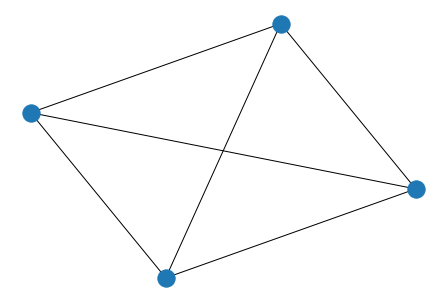

In [25]:
G_init = nx.Graph()
G_end = nx.Graph()
for i, row in pw_rels_dfs[edge_rel_name].iterrows():
    start_node = '{}'.format(''.join(row[1]))
    end_node = '{}'.format(''.join(row[2]))
    G_end.add_edge(start_node, end_node)
nx.draw(G_end)

In [26]:
# Initial Graph DataFrame Information
import pandas as pd
initial_edges = 'e(a,b).e(b,c).e(b,a).e(c,d).'
initial_edge_split = initial_edges.split('.')
s_d = []
e_d = []
num_d = [i for i in range(len(initial_edge_split)-1)]
for row in initial_edge_split[:-1]:
    r = row.split('(', 1)[1].split(')')[0]
    s_d.append(r.split(',')[0])
    e_d.append(r.split(',')[1])
init_graph_df = pd.DataFrame({'number_of_node' : num_d ,
                  'start_node' : s_d,
                  'end_node' : e_d})

In [27]:
G_init = nx.DiGraph()
G_end = nx.DiGraph()

def ConvertDF2Graph(G, df):
#Turn initial edges to panda dataframe

    for i, row in df.iterrows():
        start_node = '{}'.format(''.join(row[1]))
        end_node = '{}'.format(''.join(row[2]))
        G.add_edge(start_node, end_node)

    
ConvertDF2Graph(G_init, init_graph_df)
ConvertDF2Graph(G_end, pw_rels_dfs[edge_rel_name])


In [28]:
def draw_graph(G):
    # nodes
    nx.draw_networkx_nodes(G,pos,node_size=1000,node_color='r',)

    # edges
    nx.draw_networkx_edges(G,pos,width=3, arrowsize = 35,edge_color='b')
    #nx.draw_networkx_edges(G,pos,edgelist=esmall,
    #                    width=6,alpha=0.5,edge_color='b',style='dashed')

    # labels
    nx.draw_networkx_labels(G,pos,font_size=25,font_family='sans-serif')

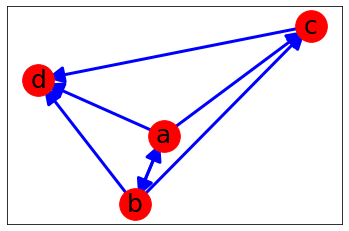

In [29]:
draw_graph(G_end)

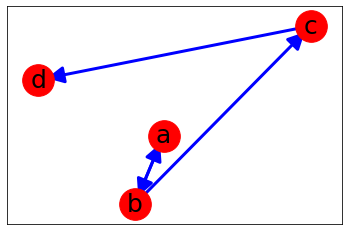

In [30]:
draw_graph(G_init)